In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
overlap = np.linspace(-0.1, 0.5, 100)

$$F_{elastic} =k_{cc} \sqrt{d_0} \delta^{1.5} \hat{\mathbf{n}}$$


In [89]:
def F_elastic(overlap):
    if overlap < 0:
        return 0

    kcc = 20000

    return kcc * np.sqrt(0.5) * (overlap ** 1.5)


F_elastic = np.vectorize(F_elastic)

In [90]:

import seaborn as sns


def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,
             **kwargs):

    fig, ax = plt.subplots(figsize=(8, 4))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 ax=ax, **kwargs, lw=4, ms=10, color="orangered")

    if xscale:
        ax.set_xscale(xscale, base=2)
    if yscale:
        ax.set_yscale(yscale, base=2)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")

In [91]:
import pandas as pd

/tmp/ipykernel_244230/1448509420.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=22)


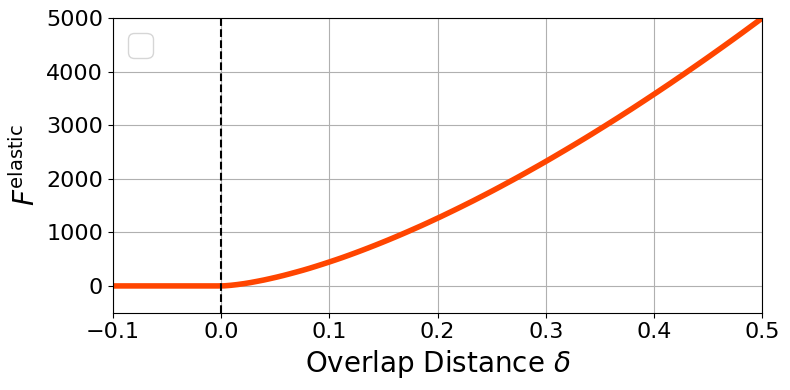

In [97]:
makeplot(
    data=pd.DataFrame({
        "overlap": overlap,
        "F_elastic": F_elastic(overlap),
    }),
    x="overlap",
    y="F_elastic",
    xlabel="Overlap Distance $\\delta$",
    ylabel="$F^{\\mathrm{elastic}}$"
)

plt.axvline(0, color="k", ls="--")

plt.xlim(-0.1, 0.5)
plt.ylim(-500, 5000)
plt.tight_layout()
plt.savefig("hertzian_contact_model.png", dpi=300)

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_244230/4007426995.py:6: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel('Overlap distance $\delta$', fontsize=14)


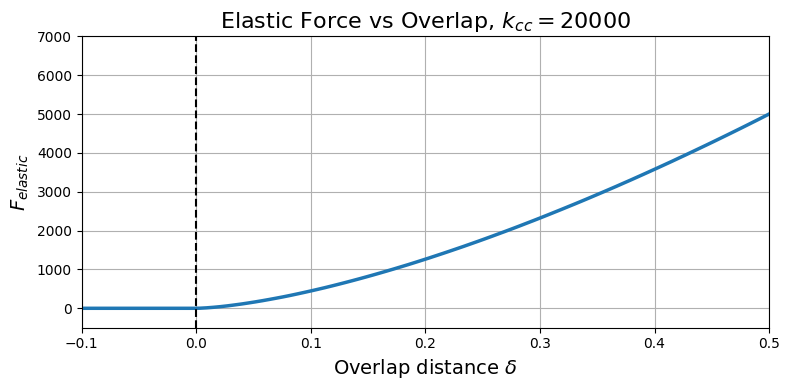

In [93]:
force = F_elastic(overlap)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(overlap, force ,linewidth=2.5)

ax.set_xlabel('Overlap distance $\delta$', fontsize=14)
ax.set_ylabel('$F_{elastic}$', fontsize=14)
ax.set_title('Elastic Force vs Overlap, $k_{cc} = 20000$', fontsize=16)

ax.set_xlim(-0.1, 0.5)
ax.set_ylim(-500, 7000)


ax.vlines(0, -500, 8000, color="black", linestyle="--")

ax.grid()
fig.tight_layout()
fig.savefig('hertzian_contact_model.png', dpi=300)